<img src='https://www.vectorlogo.zone/logos/strava/strava-icon.svg' border='0' alt='Strava-1'/>

Analisi dati Strava

Per chi non conoscesse Strava, in super sintesi è il social network dove si possono registrare tutte le attività sportive da parte degli utenti.

Come Facebook/Twitter/Instagram si possono seguire diversi profili e si può allo stesso tempo essere seguiti da altre persone.

Nella "home" pubblica vengono riportate tutte le attività effettuate dagli utenti che si seguono, si possono assegnare kudos (l'equivalente del like) e lasciare commenti.
Nella dashboard privata si possono visualizzare tutte le proprie attività, statistiche i personal best e molte altre funzioni che non starò qui ad approfondire.
Le attività possono essere caricate manualmente oppure può essere collegato automaticamente agli Smartwatch come Garmin, Coros (tra i più comuni).

<img src='https://blog.strava.com/wp-content/uploads/2020/03/03-Save-Sync-Share.png' border='0' alt='Strava-1'/>

Il mio profilo Strava è pubblico e si trova al seguente link:
https://www.strava.com/athletes/49726793

<img src='https://i.postimg.cc/ydxR8Ng8/Strava-1.png' border='0' alt='Strava-1'/>


I dati di tutte le attività sono stati ricavati attraverso le API che Strava mette a disposizione.
Per utilizzarle, è necessario configurare un APP al seguente indirizzo:
https://www.strava.com/settings/api  

La documentazione è presente al seguente link
https://developers.strava.com/docs/reference/
<img src='https://i.postimg.cc/nzgcv42N/Strava2.png' border='0' alt='Strava-1'/>

Il servizio usato è il seguente:
"List Athlete Activities (getLoggedInAthleteActivities)
Returns the activities of an athlete for a specific identifier. Requires activity:read. Only Me activities will be filtered out unless requested by a token with activity:read_all."

Le spiegazioni di come usare i link e i token di sessione al seguente video:
https://www.youtube.com/embed/sgscChKfGyg


L'esercizio è quello di:

1 - Data Analisys sui dati provenienti dal servizio Strava (getLoggedInAthleteActivities):
    Valutazione della tipologia dei dati, visualizzazione valori unici e valori nulli.
    
2 - Data Cleaning e rimozioni dati:
    Comprensione delle colonne e valutazione del perchè effettuare la rimozione dei valori
    
3 - Data Visualization:
    Grafici relativi alle attività effettuate

I primi due passaggi sono abbastanza tecnici.
Sono stati ricavati degli ulteriori dataset per capire i valori base, la tipologia delle variabili.


Consiglio di andare direttamente alla parte di Data Visualization in cui vengono mostrate le statistiche prima relative al 2022 e poi in comparazione con i dati del 2021.


Potete trovare il repository git al mio profilo:
https://github.com/scionuait/StravaDataImport

Potete scrivermi a:
gianlucachimentin@gmail.com

------------------------------------------------------------------------------------------------


Caricamento delle librerie necessarie per l'analisi

In [1]:
#import data analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import custom function to explore dataset value
from src.explore_functions import df_value_stat

#set display option value
pd.set_option('display.max_columns', None)
sns.set()
#define constant value
RANDOM_STATE = 42
TRAIL_RUNNING_ELEV = 500

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# statsmodels -> statistical tests and plots
from statsmodels.graphics.gofplots import qqplot


In [3]:
#imposta i parametri di stile per la visualizzazione dei grafici
sns.set(font_scale=0.7)
sns.set_style("darkgrid")
sns.set_palette("inferno_r")

Import del set di dati per l'analisi, il formato restituito dalle API di Strava e Json

In [4]:
#import dataset of strava activities using Strava API, form more 
df = pd.read_json("data/dataset_strava_gianluca_29_12.json")

In [5]:
#display random position of dataset
df.sample(2, random_state=RANDOM_STATE)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,average_watts,kilojoules,device_watts
395,2,"{'id': 49726793, 'resource_state': 1}",Evening Run,5595.8,1718,1725,2.0,Run,Run,NaN,4615559916,2021-01-13T18:22:28Z,2021-01-13T19:22:28Z,(GMT+01:00) Europe/Rome,3600,NaN,NaN,NaN,0,2,0,1,0,"{'id': 'a4615559916', 'summary_polyline': 'szk...",False,False,False,False,everyone,False,None,"[45.449543, 9.163907]","[45.449473, 9.163856]",3.257,5.7,81.9,16.0,True,156.9,178.0,False,True,93.6,83.0,4.929996e+09,4.929996e+09,garmin_push_6102348966,False,0,0,False,47.0,NaN,NaN,NaN
78,2,"{'id': 49726793, 'resource_state': 1}",Corsetta mattutina per Ottawa,10033.4,3547,3808,179.8,Run,Run,0.0,7397483122,2022-07-01T11:27:34Z,2022-07-01T07:27:34Z,(GMT-05:00) America/Toronto,-14400,NaN,NaN,NaN,0,3,0,1,0,"{'id': 'a7397483122', 'summary_polyline': 'cve...",False,False,False,False,everyone,False,g9651183,"[45.418109, -75.690751]","[45.416669, -75.689271]",2.829,5.8,84.3,27.0,True,151.7,168.0,False,True,74.2,-27.8,7.883149e+09,7.883149e+09,garmin_push_9120158251,False,0,5,False,67.0,NaN,NaN,NaN


In [6]:
#return dataset statistic value based on dataset value
#function available here: from src.explore_functions import df_value_stat
df_value = df_value_stat(df)

In [7]:
df_value

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,resource_state,"2 437 Name: resource_state, dtype: int64",1,int64,0,0.00
1,athlete,"{'id': 49726793, 'resource_state': 1} 437 N...",1,object,0,0.00
2,name,Morning Run 197 Eveni...,128,object,0,0.00
3,distance,0.0 13 10173.7 1 7208.9 1 6499...,425,float64,0,0.00
4,moving_time,1800 12 3605 5 3859 2 3747 2 33...,394,int64,0,0.00
5,elapsed_time,1800 11 3605 4 3602 3 3607 3 31...,391,int64,0,0.00
6,total_elevation_gain,0.0 59 4.0 27 1.0 25 3.0 ...,162,float64,0,0.00
7,type,Run 403 Workout 13 Ride ...,7,object,0,0.00
8,sport_type,Run 389 TrailRun 14 Workout ...,8,object,0,0.00
9,workout_type,0.0 125 1.0 5 3.0 3 10.0 ...,4,float64,303,69.34


Iniziamo la semplificazione del dataset iniziale di 54 righe eliminando le colonne che hanno oltre il 60% dei valori nulli che non reputo importanti per l'analisi

In [8]:
df_value[df_value["null_value_%"]>60.0]

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
9,workout_type,0.0 125 1.0 5 3.0 3 10.0 ...,4,float64,303,69.34
15,location_city,"Series([], Name: location_city, dtype: int64)",0,float64,437,100.00
16,location_state,"Series([], Name: location_state, dtype: int64)",0,float64,437,100.00
17,location_country,"Series([], Name: location_country, dtype: int64)",0,float64,437,100.00
30,gear_id,g9651183 96 g11123897 59 g9651184 1...,3,object,265,60.64
52,average_watts,59.5 1 44.7 1 76.2 1 61.0 1 21.3 ...,10,float64,427,97.71
53,kilojoules,81.3 2 381.3 1 190.9 1 264.6 1 10...,9,float64,427,97.71
54,device_watts,"0.0 10 Name: device_watts, dtype: int64",1,float64,427,97.71


In [9]:
df = df.drop(columns=df_value[df_value["null_value_%"]>60.0]["columns_name"])

In [10]:
df.head(2)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,start_date_local,timezone,utc_offset,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score
0,2,"{'id': 49726793, 'resource_state': 1}",25' risc + 8x(1F+2L),10173.7,3062,3062,14.0,Run,Run,8301355872,2022-12-28T09:45:09Z,2022-12-28T10:45:09Z,(GMT+01:00) Europe/Rome,3600,1,3,0,1,0,"{'id': 'a8301355872', 'summary_polyline': 'mzk...",False,False,False,False,everyone,False,"[45.44951383955777, 9.163602562621236]","[45.44949590228498, 9.163665007799864]",3.323,5.063,83.5,19.0,True,158.4,181.0,False,True,120.4,116.0,8.899546e+09,8.899546e+09,garmin_ping_252809870741,False,0,0,False,91.0
1,2,"{'id': 49726793, 'resource_state': 1}",Morning Run,10058.0,3182,3241,88.0,Run,Run,8293690346,2022-12-26T08:23:38Z,2022-12-26T09:23:38Z,(GMT+01:00) Europe/Rome,3600,2,4,0,1,0,"{'id': 'a8293690346', 'summary_polyline': 'car...",False,False,False,False,everyone,False,"[45.48130162060261, 7.824145266786218]","[45.48139206133783, 7.822719169780612]",3.161,5.330,83.4,22.0,True,158.8,181.0,False,True,192.8,138.8,8.890846e+09,8.890846e+09,garmin_ping_252558802816,False,0,0,False,97.0


Eliminando le colonne con oltre il 60% delle colonne nulle otteniamo 47 colonne

In [11]:
df.shape

(437, 47)

Analisi dei dati e rimozione delle colonne

In base alla tipologia di dati visualizzati sopra ho deciso di semplificare il dataset eliminando le colonne che non reputo "interessanti" al fine dell'analisi statistica annuale:

- resource_state: vale 2 in tutto il dataset, non necessario al fine di analisi sul dataset;
- athlete: nel dataset è presente un solo atleta (io) quindi non è necessario;
- id: si tratta di un valore chiave dell'attività, lo rimuovo in quanto non lo utilizzo per fare le chiamate;
- start_date_local: analogo al valore start_date ma con timezone locale;
- timezone: indica la timezone dell'attività;
- utc_offset: si tratta di 6 valori di tipo numerico nel dataset;
- photo_count: è valorizzato a 0 per tutto il dataset quindi lo tolgo;
- map: si tratta di un oggetto di tipo polilinea che indica la mappa, non è rilevante per le statistiche;
- commute: un solo valore nel dataset è uguale a True, lo rimuovo perchè non riesco a trovare una valore aggiunto;
- private: sono le attività contrassegnate come private (non sono presenti nel mio dataset) quindi le rimuovo;
- visibility: tutte le attività sono visibili quindi non mi serve quindi lo rimuovo;
- flagged: sempre valorizzato a false quindi rimuovo;
- gear_id: nel dataset sono presenti 3 valori differenti, oltre il 60% dei valori è nullo;
- start_latlng: oggetto che indica la latitudine e longitudine di partenza (non analizzato nel dataset);
- end_latlng: oggetto che indica la latitudine e longitudine di arrivo (non analizzato nel dataset);
- heartrate_opt_out: dati di battito cardiaco;
- display_hide_heartrate_option: valore che indica l'opzione di visualizzazione dei dati cardiaci;
- upload_id: valori chiave da utilizzare con altri servizi;
- upload_id_str: valori chiave da utilizzare con altri servizi;
- external_id: valori chiave da utilizzare con altri servizi;
- from_accepted_tag: sempre false tranne in un attività del 2021 quindi lo rimuovo;
- average_watts: numero che indica la potenza durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- kilojoules: numero che indica i kilojoules durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- device_watts: il numero di watts indicati dall'attività. Il numero di valori nulli è 417 quindi è già stato rimosso;


Rimuoviamo dunque le seguenti colonne dal Dataset

In [12]:
["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"]

['resource_state',
 'athlete',
 'id',
 'start_date_local',
 'timezone',
 'utc_offset',
 'photo_count',
 'map',
 'commute',
 'private',
 'visibility',
 'flagged',
 'start_latlng',
 'end_latlng',
 'heartrate_opt_out',
 'display_hide_heartrate_option',
 'upload_id',
 'upload_id_str',
 'external_id',
 'from_accepted_tag']

In [13]:
df = df.drop(columns=["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"])

In [14]:
df.shape

(437, 27)

Il numero di colonne passa dunque da 54 iniziali a 27

In [15]:
df.sample(5, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
395,Evening Run,5595.8,1718,1725,2.0,Run,Run,2021-01-13T18:22:28Z,0,2,0,1,False,False,3.257,5.7,81.9,16.0,True,156.9,178.0,93.6,83.0,0,0,False,47.0
78,Corsetta mattutina per Ottawa,10033.4,3547,3808,179.8,Run,Run,2022-07-01T11:27:34Z,0,3,0,1,False,False,2.829,5.8,84.3,27.0,True,151.7,168.0,74.2,-27.8,0,5,False,67.0
278,Evening Run,10852.6,3627,3627,0.0,Run,Run,2021-07-09T16:48:54Z,0,3,0,1,False,False,2.992,4.6,79.6,30.0,True,152.0,165.0,116.8,114.9,0,0,False,84.0
305,Morning Run,2782.3,962,971,4.0,Run,Run,2021-05-31T06:18:47Z,0,3,0,1,False,False,2.892,4.0,82.0,24.0,True,142.2,154.0,150.2,146.0,0,0,False,12.0
325,Morning Run,9221.1,3125,3422,3.0,Run,Run,2021-04-29T05:19:52Z,0,2,0,1,False,False,2.951,5.1,82.7,26.0,True,157.7,168.0,117.4,114.0,0,0,False,90.0


Dei valori presenti nel dataset cercho di chiarire la differenza tra moving time e elapsed time visualizzando le statistiche di base (minino, massimo, media e deviazione standard)

In [16]:
df[["moving_time","elapsed_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
moving_time,437.0,4465.336384,5420.685526,712.0,2414.0,3311.0,4174.0,82800.0
elapsed_time,437.0,4761.217391,5823.773233,737.0,2521.0,3375.0,4289.0,82800.0


<AxesSubplot:>

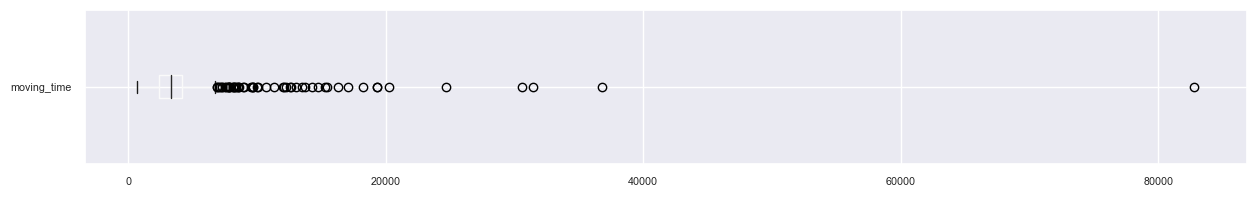

In [17]:
plt.figure(figsize=(15,2))
df[["moving_time"]].boxplot(vert=False)

In [18]:
df[df["moving_time"]==df["moving_time"].max()]

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
38,"Tot dret 130 12000 D+, 39 ore",135000.0,82800,82800,0.0,Run,TrailRun,2022-09-13T19:00:15Z,0,14,4,1,False,True,1.63,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,0,6,False,NaN


In questa attività manca il total_elevation_gain perchè il Garmin era "morto" durante la gara e perciò ho inserito manualmente il numero di km ma non il dislivello

In [19]:
#inserisco manualmente il dislivello
df.loc[38,"total_elevation_gain"] = 12000

Per chiarire la differenza tra i valori cerco una gara che ho fatto quest'anno di cui ricordo il tempo

In [20]:
df[(df["moving_time"]!=df["elapsed_time"]) & (df["name"].str.contains("Ferriere"))].head(5)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
107,Ferriere Trail Giro di Sardegna 😂 31 km 1600+,29367.4,14732,15278,1542.3,Run,Run,2022-04-30T07:59:08Z,0,10,2,1,False,False,1.922,5.444,70.6,25.0,True,136.5,170.0,1524.5,623.2,0,2,False,164.0


- Moving time: fa riferimento al tempo in movimento durante la gara (il garmin per esempio anche senza essere stoppato tende ad escludere il tempo in cui una persona è ferma);
- Elapsed time: fa riferimento al tempo di durata di tutta l'attività;

Esempio nella gara sopra selezionata il Ferriere Trail il tempo segnato alla fine dal Garmin era più basso del tempo registrato nel cronometro durante la gara.




Questo perchè durante i ristori il garmin ha smesso di registrare il tempo in movimento.
Se alla fine dell'attività contrassegnamo l'attività come gara il tempo visualizzato è diverso (quindi viene considerato l'elapsed time e non il moving time).

Nel dataset può essere utile analizzare entrambi i valori (per esempio per vedere quanto in gare lunghe mi fermo ai ristori).


Verifico anche l'unità di misura per le speed

In [21]:
df[["average_speed","max_speed"]].describe().T

,count,mean,std,min,25%,50%,75%,max
average_speed,437.0,2.892979,0.821603,0.0,2.897,3.076,3.216,6.547
max_speed,437.0,5.098707,1.848106,0.0,4.400,4.880,5.665,21.960


Per capire l'unità di misura della della corsa prendo come riferimento una corsa che so a quanto l'ho corsa come media oraria, la Maratona di Atene corsa in meno di 4 ore (poco sopra i 10 km orari 11 circa)

In [22]:
df[df["name"].str.contains("Athens")]

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
206,The Real Maratona of Athens,42047.0,14250,14297,338.9,Run,Run,2021-11-14T07:23:38Z,3,16,2,13,False,False,2.941,4.866,81.9,25.0,True,156.4,171.0,246.8,8.9,1,0,False,405.0


In [23]:
42047.0 / 14297

2.940966636357278

La distanza è espressa con il rapporto tra distance (m) e elapsed_time (s) quindi è metro al secondo.
Per fare la conversione in orario (cosa che preferisco) bisogna moltiplicare * 3.6

In [24]:
df["average_speed"] = df["average_speed"]*3.6

Il valore di Max Speed non è attendibile, contiene probabilmente errori di misurazione dello strumento, anche perchè il valore massimo registrato è di 22 m/s che significherebbe circa 60 km/h

Verifichiamo nuovamente le statistiche a valle della pulizia delle colonne:

In [25]:
df_value_clean = df_value_stat(df)

In [26]:
df_value_clean

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,name,Morning Run 197 Eveni...,128,object,0,0.00
1,distance,0.0 13 10173.7 1 7208.9 1 6499...,425,float64,0,0.00
2,moving_time,1800 12 3605 5 3859 2 3747 2 33...,394,int64,0,0.00
3,elapsed_time,1800 11 3605 4 3602 3 3607 3 31...,391,int64,0,0.00
4,total_elevation_gain,0.0 58 4.0 27 1.0 25 3.0 ...,163,float64,0,0.00
5,type,Run 403 Workout 13 Ride ...,7,object,0,0.00
6,sport_type,Run 389 TrailRun 14 Workout ...,8,object,0,0.00
7,start_date,2022-12-28T09:45:09Z 1 2021-06-23T05:26:38Z...,437,object,0,0.00
8,achievement_count,0 238 1 69 2 28 3 20 5 ...,23,int64,0,0.00
9,kudos_count,1 122 2 102 3 88 0 53 4 ...,15,int64,0,0.00


Cerchiamo di chiarire la differenza tra il parametro di type e Sport Type andando ad estrarre due attività in cui il valore di Type e Sport Type è differente.

In [27]:
df[df["type"]!= df["sport_type"]].tail(2)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
77,ToRunTo 😂,23358.1,7818,8419,156.0,Run,TrailRun,2022-07-03T12:03:35Z,0,7,0,1,False,False,10.7568,6.057,84.7,24.0,True,149.1,179.0,41.4,-30.6,0,4,False,133.0
86,Trail Oasi Zegna 60 3600+,56642.3,36800,41184,3332.0,Run,TrailRun,2022-06-12T04:34:45Z,1,12,0,1,False,False,5.5404,4.658,59.0,29.0,True,114.1,163.0,1874.1,700.3,0,4,False,137.0


Visualizziamo le attività reggruppando per Type e Sport Type.

In [28]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           389
           TrailRun       14
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            4
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Le uniche differenze sono tra Run e Trail Run.
Ricordo che l'attività di Trail Running è stata introdotta su Strava di recente, probabilmente hanno deciso di introdurre una nuova colonna (sport type) per riuscire a discriminare tra Running e Trail Running senza andare a cancellare lo storico e trattando il Trail come un sottoinsieme delle attività di Running ma allo stesso tempo dando possibilità agli utenti di discriminare tra Run e Trail Run (ma questo è solamente un mio pensiero)

Il numero di attività relative al Trail running sono molto basse rispetto al numero di attività che ho effettivamente fatto, non mi torna. Dato che quando faccio delle sessioni di trail faccio solitamente almeno più di 300/400 metri di dislivello faccio una verifica sulle attività che superano questa soglia di dislivello e vado a reimpostare i valori in Trail Run.



In [29]:
df.loc[(df["total_elevation_gain"]>TRAIL_RUNNING_ELEV) & (df["type"]=="Run"),"sport_type"]="TrailRun"

In [30]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           364
           TrailRun       39
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            4
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Per facilitare la visualizzazione dei dati e trattarli come serie, effettuo prima una conversione del parametro Start_Date (importato come object) e lo utilizzo come indice del dataset.

In [31]:
#convert start date type
df['start_date'] = pd.to_datetime(df['start_date'])

In [32]:
#set index data
df = df.set_index(df.start_date)
df.sample(2, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-13 18:22:28+00:00,Evening Run,5595.8,1718,1725,2.0,Run,Run,2021-01-13 18:22:28+00:00,0,2,0,1,False,False,11.7252,5.7,81.9,16.0,True,156.9,178.0,93.6,83.0,0,0,False,47.0
2022-07-01 11:27:34+00:00,Corsetta mattutina per Ottawa,10033.4,3547,3808,179.8,Run,Run,2022-07-01 11:27:34+00:00,0,3,0,1,False,False,10.1844,5.8,84.3,27.0,True,151.7,168.0,74.2,-27.8,0,5,False,67.0


Per facilitare i raggruppamenti, in considerazione degli anni successivi aggiungo anche le colonne relative all'anno, mese e giorno della settimana

In [33]:
df["years"] = df.index.year
df["month"] = df.index.month
df["day_of_week"] = df.index.day_name()

In [34]:
df.sample(2, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-13 18:22:28+00:00,Evening Run,5595.8,1718,1725,2.0,Run,Run,2021-01-13 18:22:28+00:00,0,2,0,1,False,False,11.7252,5.7,81.9,16.0,True,156.9,178.0,93.6,83.0,0,0,False,47.0,2021,1,Wednesday
2022-07-01 11:27:34+00:00,Corsetta mattutina per Ottawa,10033.4,3547,3808,179.8,Run,Run,2022-07-01 11:27:34+00:00,0,3,0,1,False,False,10.1844,5.8,84.3,27.0,True,151.7,168.0,74.2,-27.8,0,5,False,67.0,2022,7,Friday


Al termine della prima parte di modifica del dataset visualizzo una panoramica delle attività negli anni per capire come concentrare l'analisi e valutare quali righe andare a rimuovere.

In [35]:
pd.DataFrame(df.groupby(["sport_type","years"]).count()["name"])

name
sport_type years      
Hike       2020      1
           2021      2
           2022      1
Ride       2021      5
           2022      5
Run        2020     34
           2021    201
           2022    129
Snowboard  2022      1
Swim       2022      2
TrailRun   2021     12
           2022     27
Walk       2021      3
           2022      1
Workout    2021      1
           2022     12

Aggiungo qualche valore che mi può tornare utile per l'analisi:
- tempo in movimento in minuti (al posto dei secondi)
- distanza in km
- tempo di riposo nelle attività (la differenza tra il tempo in movimento e il tempo delle attività)

In [36]:
df["Moving_time_minute"] = df["moving_time"]/60.0
df["distance_km"] = df["distance"]/1000.0
df["rest_time"] = df["elapsed_time"]-df["moving_time"]
df["rest_time_minute"] = df["rest_time"] / 60.0

Dalla tabella relativa alle attività, posso dedurre come effettivamente le uniche attività che vale la pena analizzare sono Run e Trail Run. Inoltre le attività prima del 2020 posso rimuoverle in quanto sono solamente dati parziali, in precedenza utilizzavo Runtastic per effettuare le attività.
Come ultima fase di pulizia del dataset:
- rimuovo i valori del 2020
- considero solamente le attività di Run e Trail Run


In [37]:
df_final = df[((df["sport_type"]=="Run") | (df["sport_type"]=="TrailRun"))&(df["years"]!=2020)]

Data Visualization
Inizio a fare un po' di visualizzazione dei dati:
- totale attività da quando utilizzo Strava
- 2022
- differenza 2021/2022

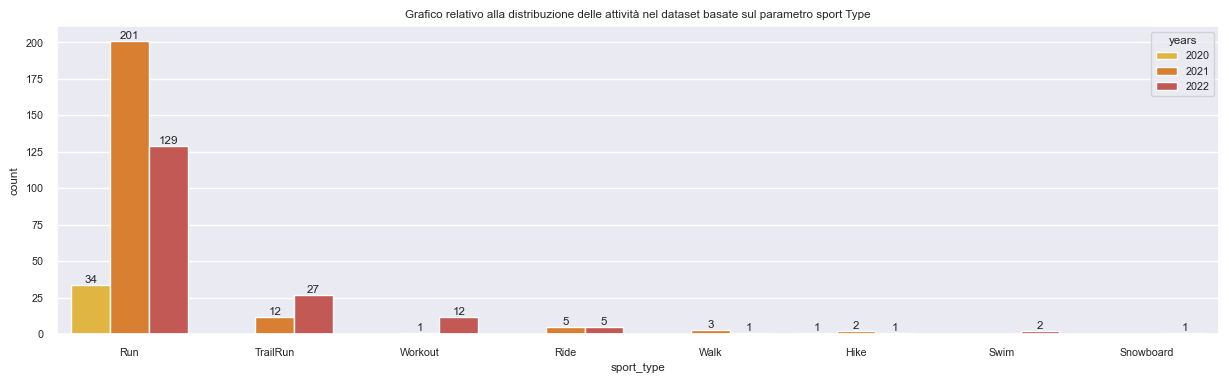

In [38]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x="sport_type", order=df['sport_type'].value_counts().index, hue="years")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Grafico relativo alla distribuzione delle attività nel dataset basate sul parametro sport Type")
plt.show()

------------------------------------------------------------------------------------------------

Visualizzazione attività 2022

<img src='https://i.postimg.cc/qvRdrqYN/Strava3.png' border='0' alt='Strava-1'/>


Iniziamo con qualche media raggruppata per le attività

In [39]:
df_final[df_final["years"]==2022].groupby(["sport_type"]).mean()[["distance","Moving_time_minute","total_elevation_gain","average_speed","average_heartrate"]]

,distance,Moving_time_minute,total_elevation_gain,average_speed,average_heartrate
sport_type,,,,,
Run,10535.048837,55.431525,22.764341,11.447191,155.650394
TrailRun,28974.244444,273.522222,1779.018519,6.893867,136.130769


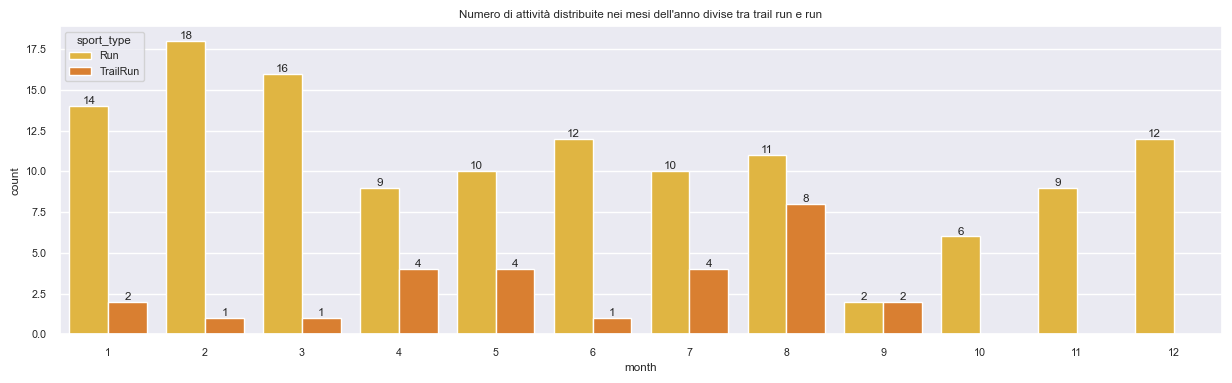

In [40]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df_final[df_final["years"]==2022], x="month", hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di attività distribuite nei mesi dell'anno divise tra trail run e run")
plt.show()

Distanza totale del 2022 distribuita per i mesi

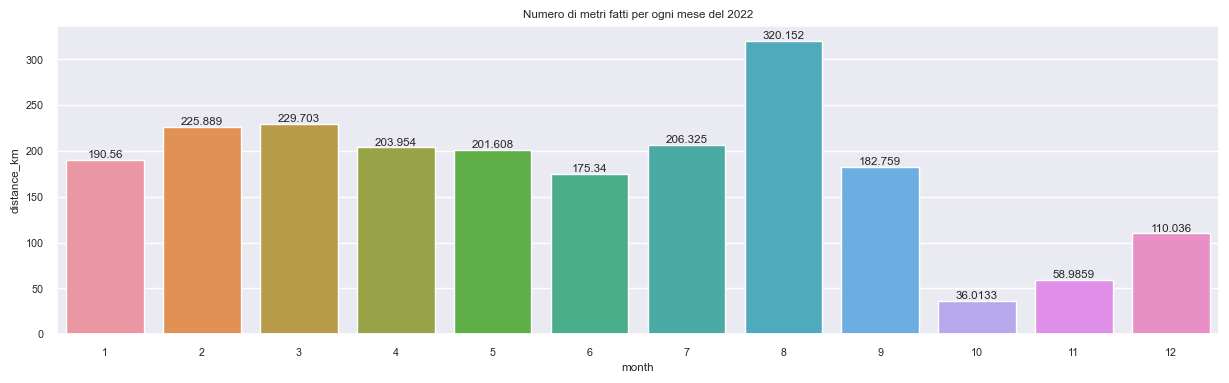

In [41]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="distance_km", estimator=sum, ci=None)

for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di metri fatti per ogni mese del 2022")
plt.show()

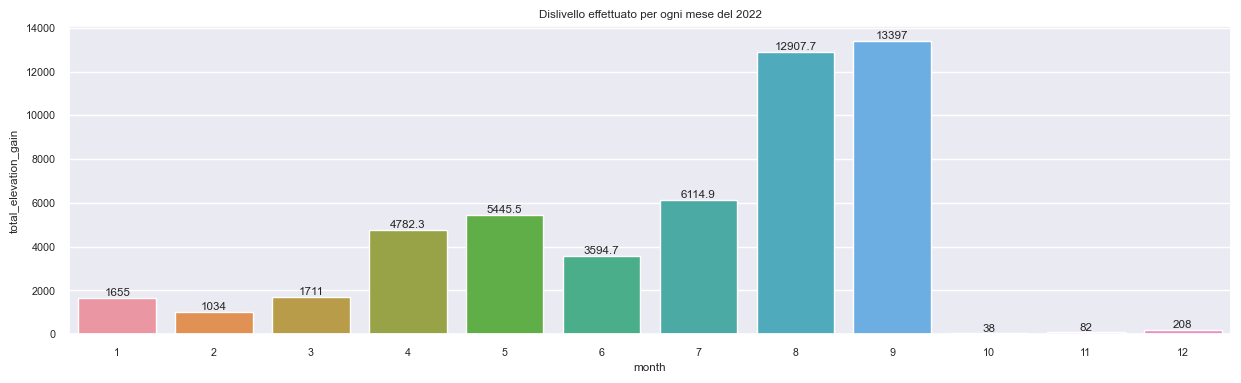

In [42]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="total_elevation_gain", estimator=sum, ci=None)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Dislivello effettuato per ogni mese del 2022")
plt.show()

Distanza annuale del 2022 suddivisa tra attività di Trail e corsa nei vari mesi

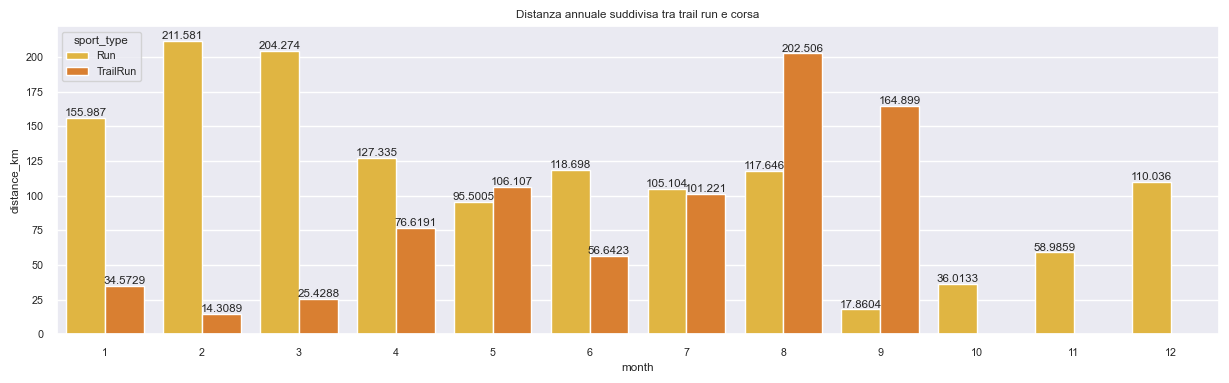

In [43]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="distance_km", estimator=sum, ci=None,hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Distanza annuale suddivisa tra trail run e corsa")
plt.show()

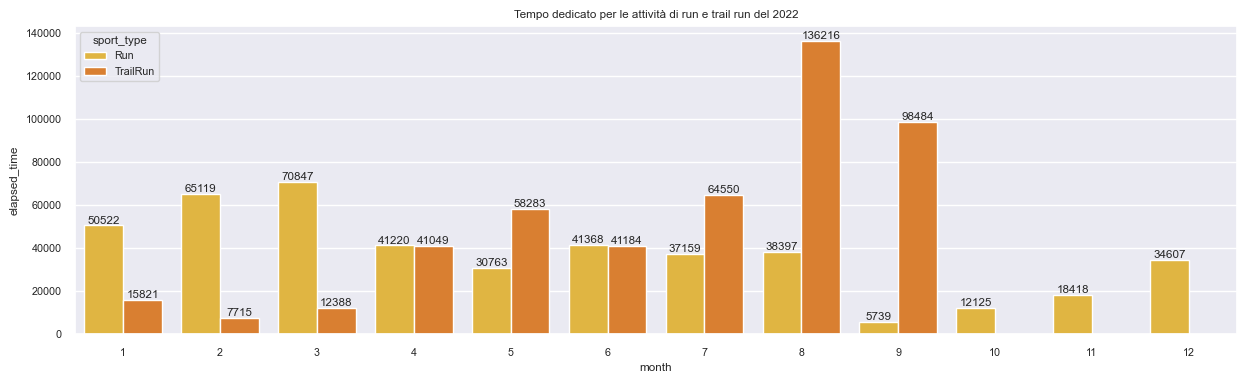

In [44]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final[df_final["years"]==2022], x="month", y="elapsed_time", estimator=sum, ci=None,hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Tempo dedicato per le attività di run e trail run del 2022")
plt.show()

Attività più lunghe in termini di distanza fatte nel 2022

<AxesSubplot:ylabel='name'>

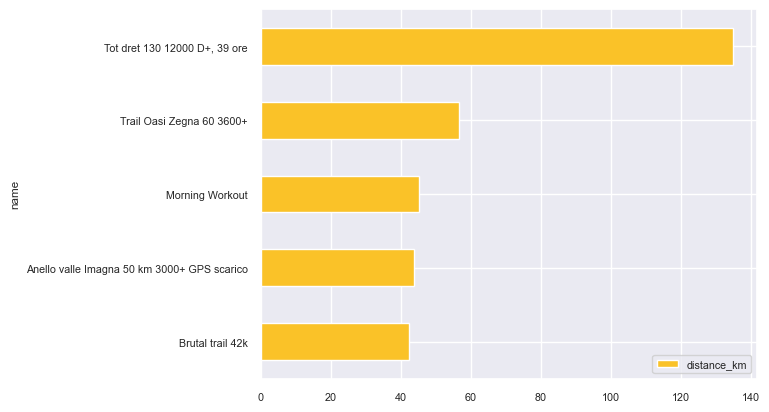

In [86]:
df_final_2 = df_final[df_final["years"]==2022].sort_values('distance_km', ascending = True)
df_final_2.tail(5).plot(kind="barh", x="name", y="distance_km")

Attività con più minuti passati a riposo e senza correre

<AxesSubplot:ylabel='name'>

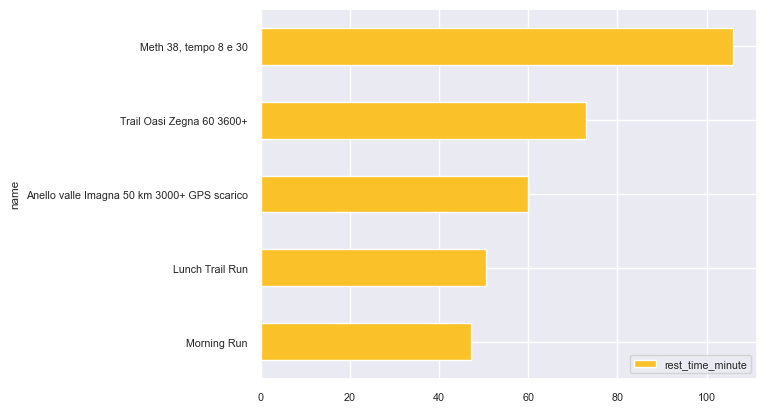

In [87]:
df_final_3 = df_final[df_final["years"]==2022].sort_values('rest_time_minute', ascending = True)
df_final_3.tail(5).plot(kind="barh", x="name", y="rest_time_minute")

Confermo che l'attività in cui mi sono riposato di più è il Meth, purtroppo avendo inserito manualmente la data per il Tot Dret non ho i dati di riposo per quella attività.

Il meth, nonostante fosse solamente di 38km, è stata una gara per me molto difficile, il percorso era estremamente tecnico e ho sofferto molto il freddo (location bellissime).


<img src='https://i.postimg.cc/wBZDfMyK/Schermata-2022-12-29-alle-15-16-17.png' border='0' alt='Strava-1'/>


------------------------------------------------------------------------------------------------

Visualizzo le correlezioni tra il tempo di riposo ai ristori, la distanza e il dislivello positivo

In [47]:
df_trail_no_tot_dret = df_final[(df_final["years"]==2022) & (df_final["sport_type"]=="TrailRun")]
#rimuovo l'attività del tot dret
df_trail_no_tot_dret = df_trail_no_tot_dret.drop(df_trail_no_tot_dret[df_trail_no_tot_dret['name']=='Tot dret 130 12000 D+, 39 ore'].index)


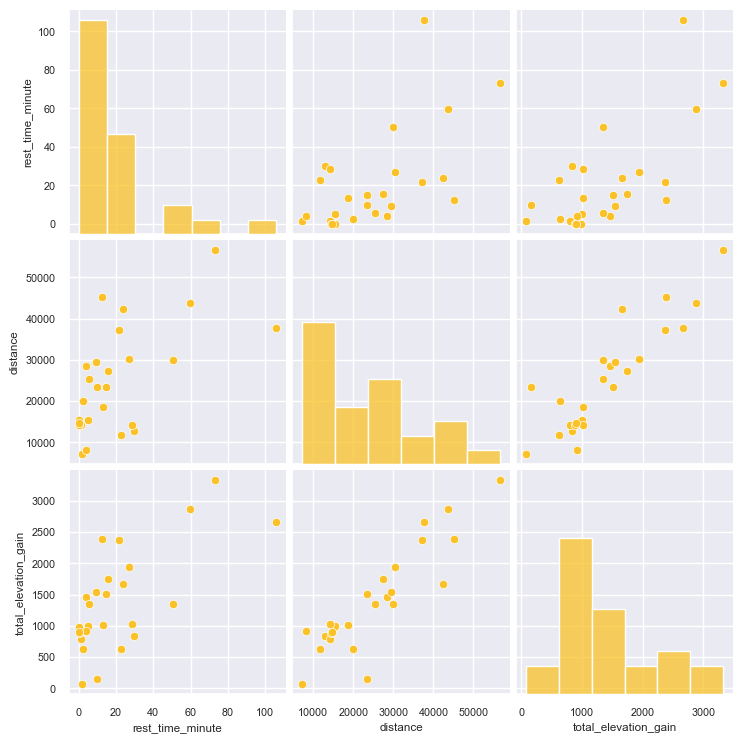

In [48]:
sns.pairplot(data=df_trail_no_tot_dret[["rest_time_minute","distance","total_elevation_gain"]])

Non c'è una correlazione lineare tra i rest_time_minute e la distanza/dislivello, mentre è presente tra la distanza e il dislivello positivo. Questo perchè la proporzione nelle gare di trail, tra il dislivello e i km è abbastanza lineare (almeno nella tipologia di gare che faccio io). Se facessi delle vertical la proporzione sarebbe diversa (molto più dislivello rispetto ai km fatti).

In [49]:
df_final[(df_final["years"]==2022) & (df_final["sport_type"]=="TrailRun")][["rest_time_minute"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rest_time_minute,27.0,20.11358,25.484897,0.0,3.125,12.3,25.55,105.966667


Per ogni gara di Trail fatta nel 2022 in media sono stato ai ristori per 20 minuti

--------------------------------------------------------------------------------------

Facciamo un confronto tra il 2021 e il 2022


<img src='https://i.postimg.cc/cHhLTHb0/21-22.png' border='0' alt='Strava-1'/>


In [50]:
df_final.groupby(["years","sport_type"]).mean()[["distance","moving_time","total_elevation_gain","average_speed","average_heartrate"]]

distance   moving_time  total_elevation_gain  \
years sport_type                                                     
2021  Run         10426.977612   3461.472637             36.436816   
      TrailRun    16280.141667   8127.250000            897.975000   
2022  Run         10535.048837   3325.891473             22.764341   
      TrailRun    28974.244444  16411.333333           1779.018519   

                  average_speed  average_heartrate  
years sport_type                                    
2021  Run             10.927182         151.944949  
      TrailRun         7.381800         148.416667  
2022  Run             11.447191         155.650394  
      TrailRun         6.893867         136.130769

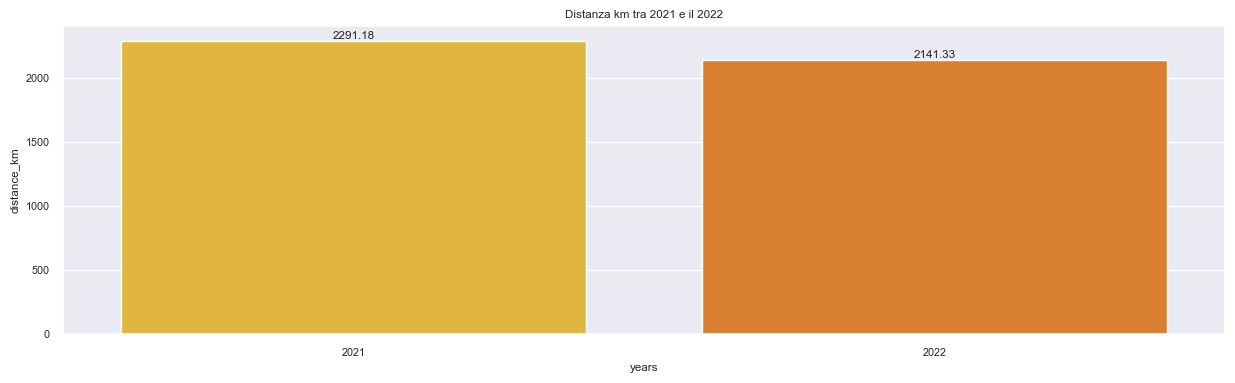

In [51]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final, x="years", y="distance_km", estimator=sum, ci=None)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Distanza km tra 2021 e il 2022")
plt.show()

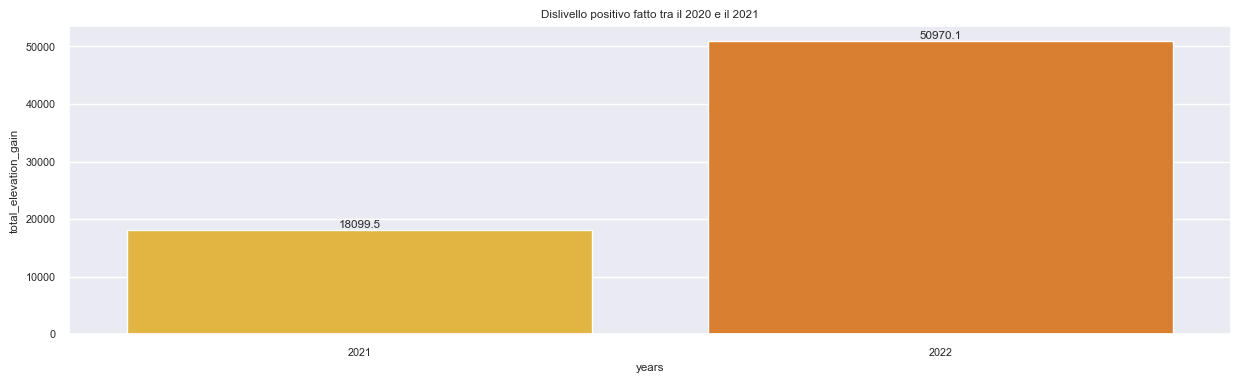

In [52]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final, x="years", y="total_elevation_gain", estimator=sum, ci=None)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Dislivello positivo fatto tra il 2020 e il 2021")
plt.show()

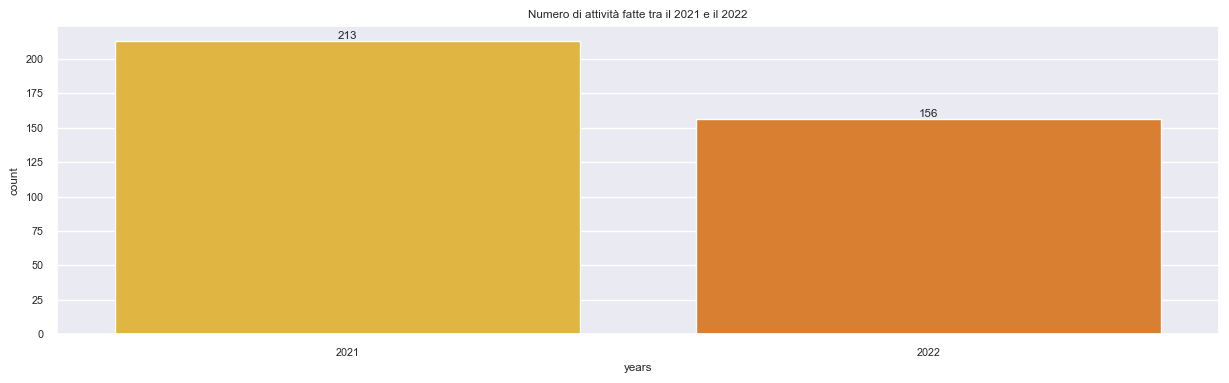

In [53]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df_final, x="years")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di attività fatte tra il 2021 e il 2022")
plt.show()

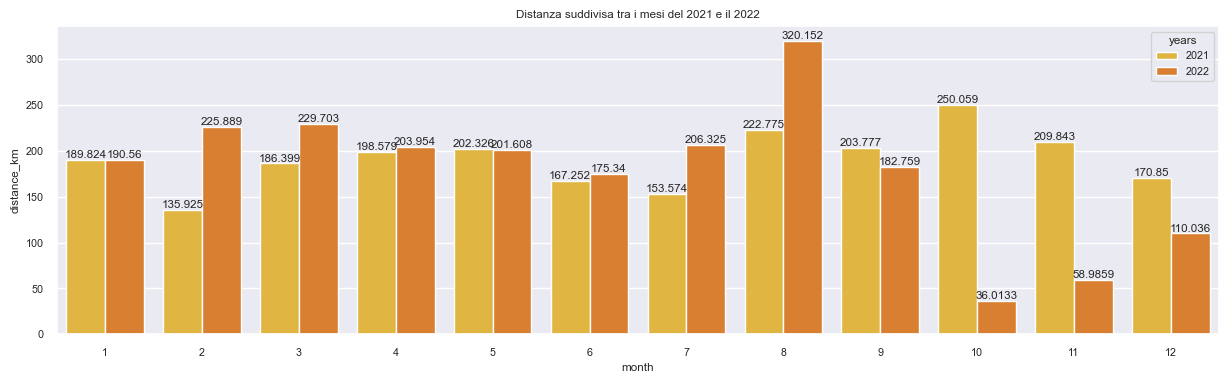

In [54]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df_final, x="month", y="distance_km", estimator=sum, ci=None,hue="years")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Distanza suddivisa tra i mesi del 2021 e il 2022")
plt.show()

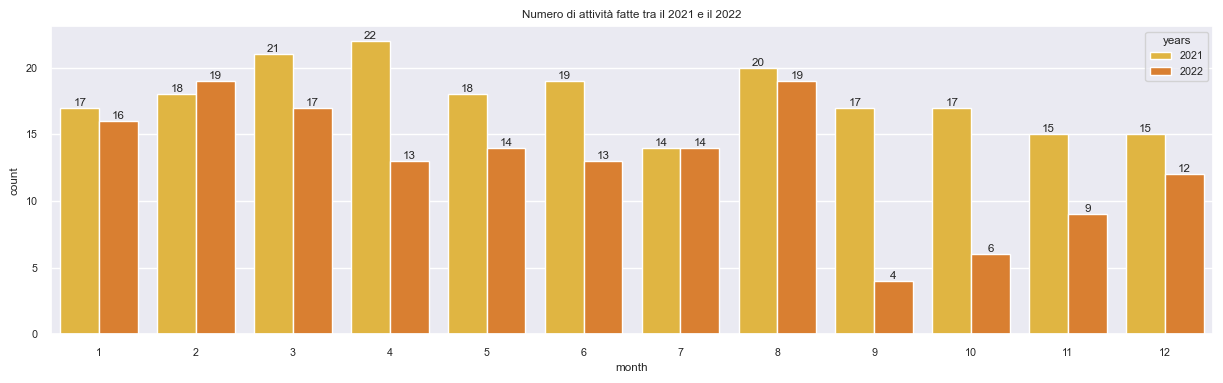

In [55]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df_final, x="month", hue="years")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Numero di attività fatte tra il 2021 e il 2022")
plt.show()

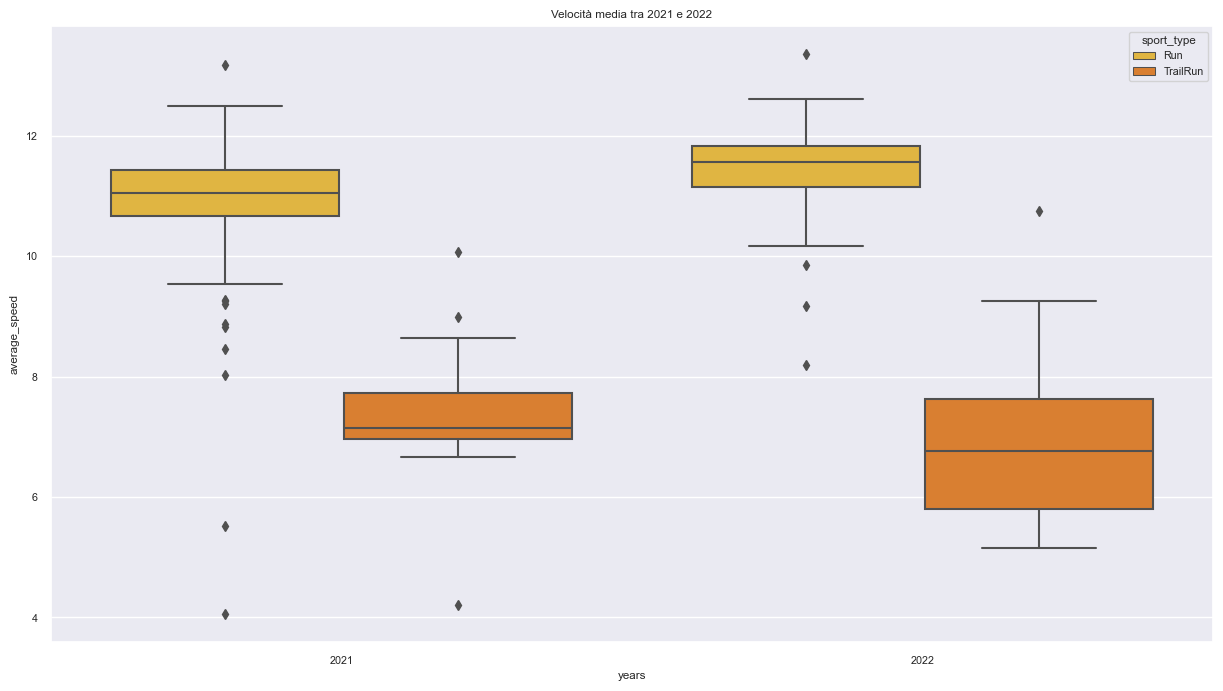

In [56]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df_final, x="years", y="average_speed", hue="sport_type")
for container in ax.containers:
    ax.bar_label(container)

ax.set_title(label="Velocità media tra 2021 e 2022")
plt.show()

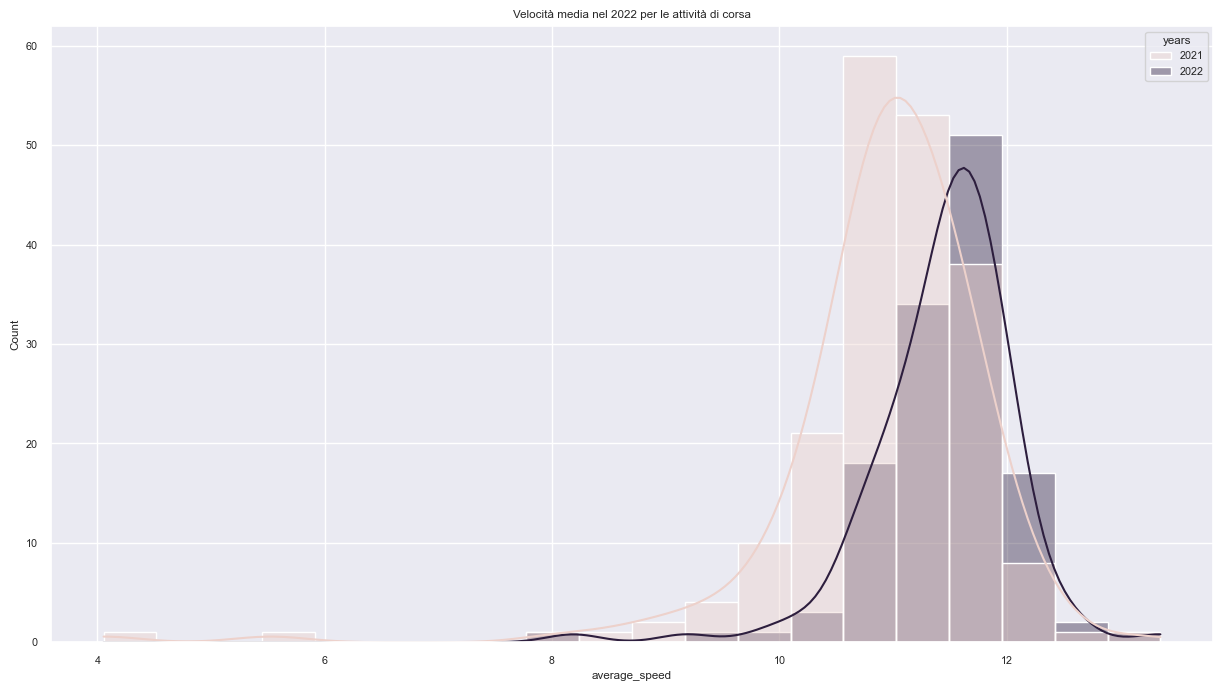

In [57]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_final[df_final["sport_type"]=="Run"], bins=20, x="average_speed",hue="years", kde=True, alpha=0.4)

ax.set_title(label="Velocità media nel 2022 per le attività di corsa")
plt.show()

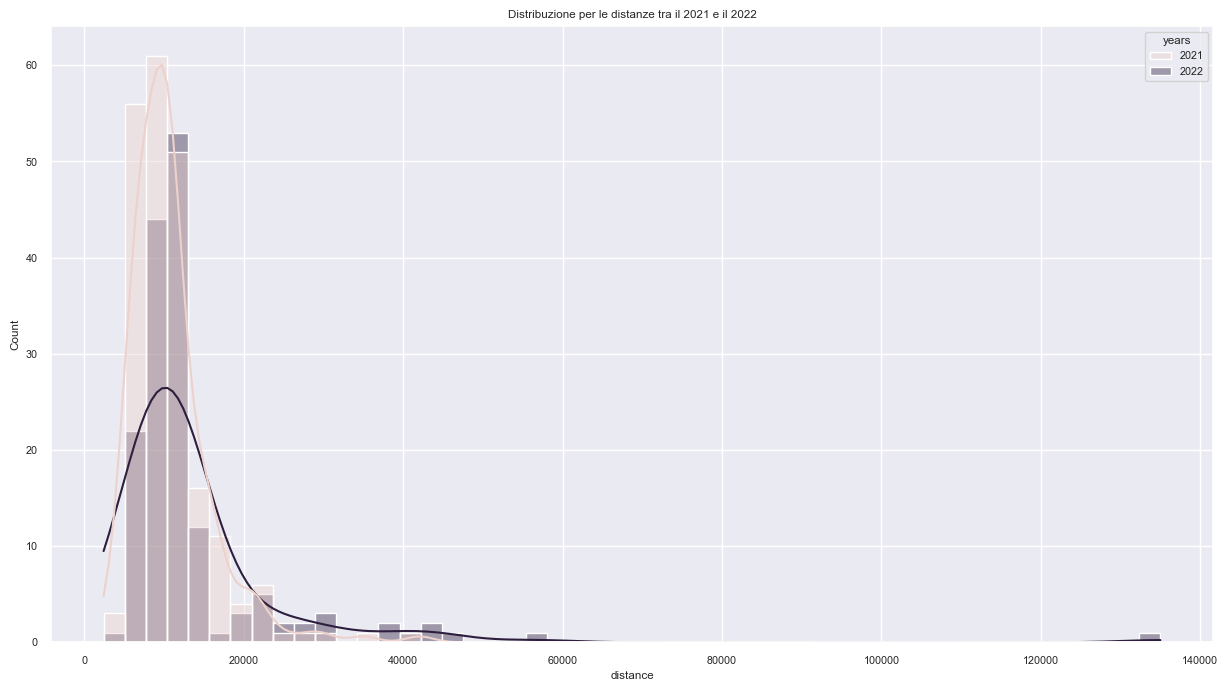

In [58]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_final, bins=50, x="distance",hue="years", kde=True, alpha=0.4)

ax.set_title(label="Distribuzione per le distanze tra il 2021 e il 2022")
plt.show()

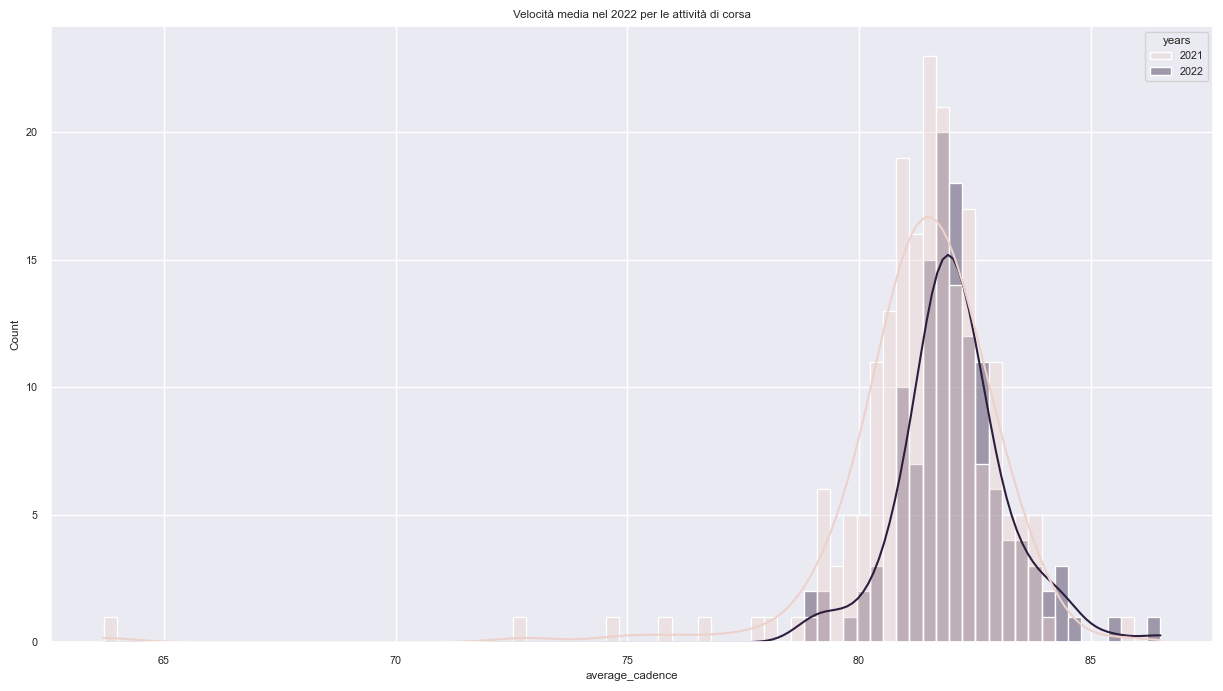

In [59]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_final[df_final["sport_type"]=="Run"], bins=80, x="average_cadence",hue="years", kde=True, alpha=0.4)

ax.set_title(label="Velocità media nel 2022 per le attività di corsa")
plt.show()

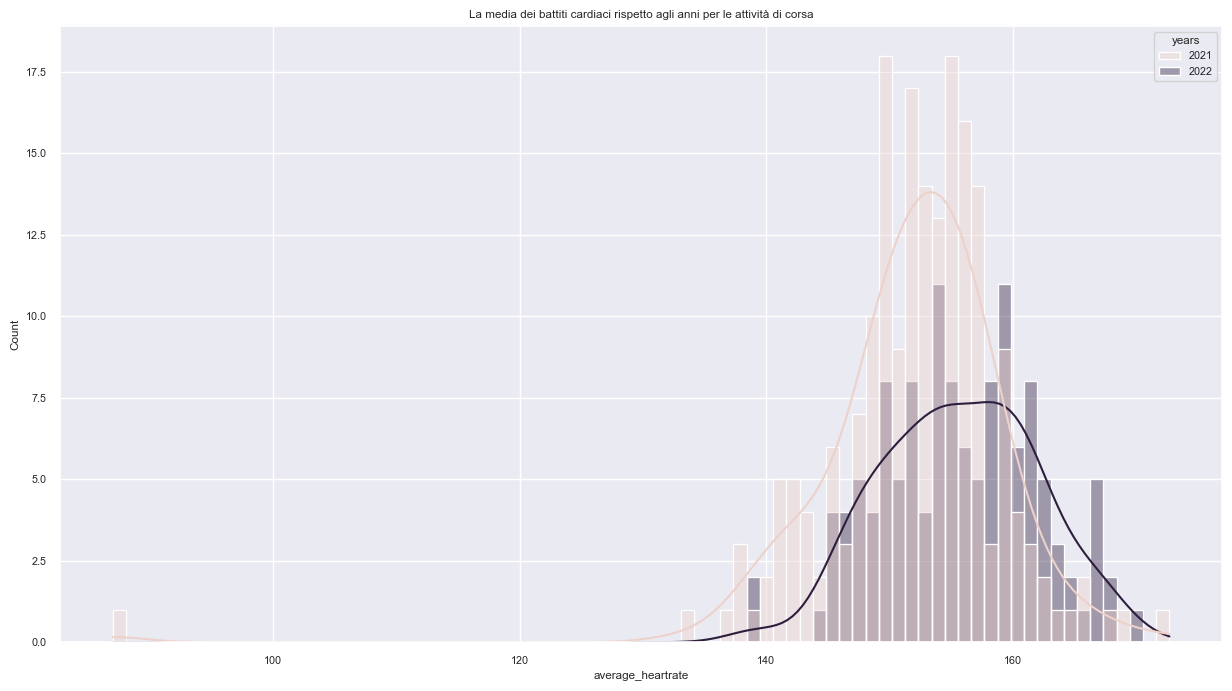

In [85]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_final[df_final["sport_type"]=="Run"], bins=80, x="average_heartrate",hue="years", kde=True, alpha=0.4)

ax.set_title(label="La media dei battiti cardiaci rispetto agli anni per le attività di corsa")
plt.show()

Proviamo a cercare una correlazione tra le variabili nel dataset

In [61]:
#visualizzo nuovamente le variabili
df_final.columns

Index(['name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'start_date',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'trainer', 'manual', 'average_speed', 'max_speed', 'average_cadence',
       'average_temp', 'has_heartrate', 'average_heartrate', 'max_heartrate',
       'elev_high', 'elev_low', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'years', 'month', 'day_of_week', 'Moving_time_minute',
       'distance_km', 'rest_time', 'rest_time_minute'],
      dtype='object')

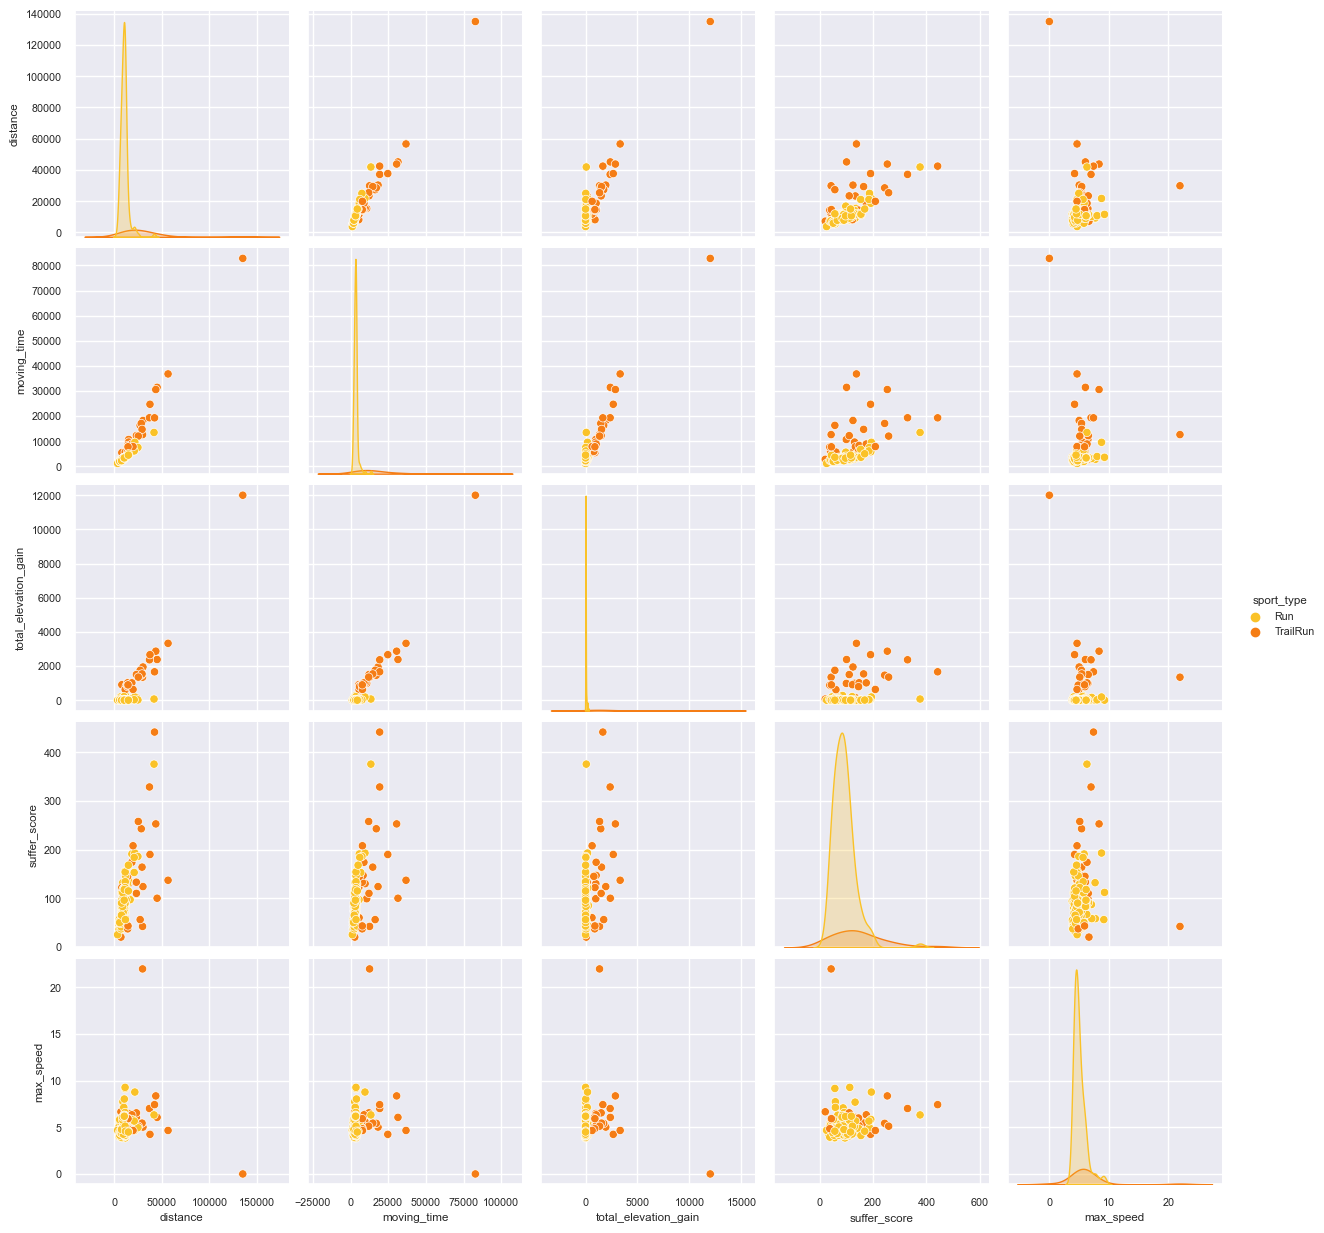

In [62]:
sns.pairplot(data=df_final[df_final["years"]==2022][['distance', 'moving_time', 'total_elevation_gain','sport_type','suffer_score','max_speed']], hue="sport_type")

Il grafico mostra una correlazione lineare (vabbè era ovvio :) ) tra il tempo di movimento e la distanza percorsa, è ovvio pensare che all'aumentare del tempo di movimento aumenti anche la distanza percorsa. C'è una correlazione lineare anche tra la distanza percorsa e il total elevation gain ma solamente con i pallini blu. Questo perchè nelle attività di Run non faccio praticamente mai del dislivello.

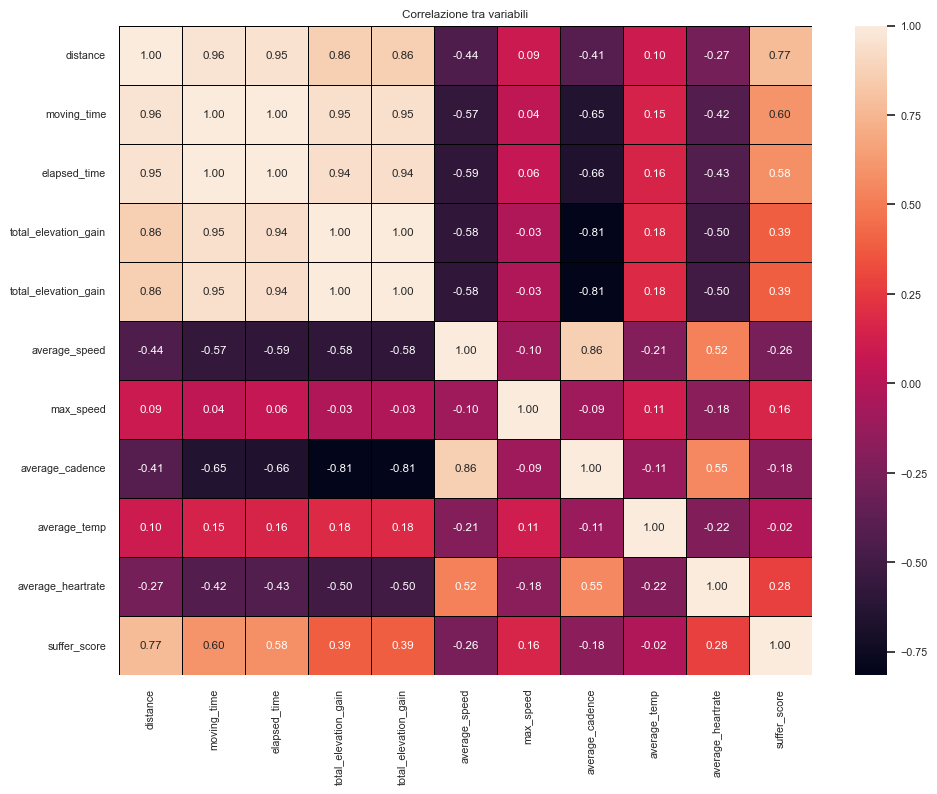

In [63]:
plt.figure(figsize=(10, 8))
df_corr = df_corr = df_final[['distance','moving_time','elapsed_time','total_elevation_gain','total_elevation_gain','average_speed','max_speed','average_cadence','average_temp','average_heartrate','suffer_score']].corr()
plt.title(label="Correlazione tra variabili")
sns.heatmap(data=df_corr, annot=True, fmt=".2f", linewidths=0.5, linecolor="black")
plt.tight_layout()
plt.show()

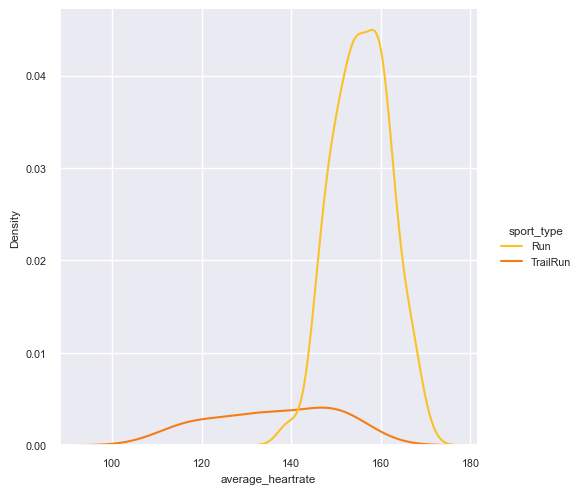

In [64]:
sns.displot(data=df_final[df_final["years"]==2022], x="average_heartrate", hue="sport_type", kind="kde")

Curioso vedere come le attività di corsa, rispetto a quelle di trail hanno una maggiore frequenza cardiaca. Principalmente questo avviene perchè nelle attività di trail in faccio delle "camminate veloci" e la mia frequenza cardiaca non cresce così tanto come durante le attività di corsa.

Voglio provare a fare un modello sulla base del mio dataset delle attività di sola corsa (escludo il Trail Running) che mi preveda il tempo data la distanza.

OVVIO CHE SI SCHERZA CI SONO POCHI DATI E NON CREDO SIA PROPRIO ESATTO COME METODO :)

In [65]:
df_final = df_final.drop(columns="start_date")
df_final

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week,Moving_time_minute,distance_km,rest_time,rest_time_minute
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-28 09:45:09+00:00,25' risc + 8x(1F+2L),10173.7,3062,3062,14.0,Run,Run,1,3,0,1,False,False,11.9628,5.063,83.5,19.0,True,158.4,181.0,120.4,116.0,0,0,False,91.0,2022,12,Wednesday,51.033333,10.1737,0,0.000000
2022-12-26 08:23:38+00:00,Morning Run,10058.0,3182,3241,88.0,Run,Run,2,4,0,1,False,False,11.3796,5.330,83.4,22.0,True,158.8,181.0,192.8,138.8,0,0,False,97.0,2022,12,Monday,53.033333,10.0580,59,0.983333
2022-12-24 15:00:40+00:00,Afternoon Run,11687.1,3675,3678,0.0,Run,Run,0,4,0,1,False,False,11.4480,3.859,82.2,20.0,True,154.2,167.0,116.4,60.6,0,0,False,94.0,2022,12,Saturday,61.250000,11.6871,3,0.050000
2022-12-22 05:43:06+00:00,25'risc + 3x 10 m 2'rec,9385.4,2996,3068,8.0,Run,Run,0,2,0,2,False,False,11.2788,7.075,82.8,18.0,True,158.1,177.0,148.4,76.4,0,0,False,87.0,2022,12,Thursday,49.933333,9.3854,72,1.200000
2022-12-19 18:09:17+00:00,50' L,9408.0,3046,3052,8.0,Run,Run,0,3,0,1,False,False,11.1204,4.137,81.2,15.0,True,145.2,163.0,155.0,87.8,0,0,False,45.0,2022,12,Monday,50.766667,9.4080,6,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11 06:33:03+00:00,Morning Run,10869.3,3618,3732,7.0,Run,Run,0,0,0,1,False,False,10.8144,4.600,82.2,11.0,True,149.5,161.0,99.6,93.0,0,0,False,79.0,2021,1,Monday,60.300000,10.8693,114,1.900000
2021-01-09 15:03:03+00:00,Afternoon Run,20747.1,6921,6962,19.0,Run,Run,8,4,0,1,False,False,10.7928,4.800,81.4,13.0,True,159.8,186.0,96.0,88.6,5,0,False,221.0,2021,1,Saturday,115.350000,20.7471,41,0.683333
2021-01-07 06:23:45+00:00,Morning Run,7640.5,2419,2435,10.0,Run,Run,2,1,0,1,False,False,11.3724,4.300,80.6,16.0,True,154.5,172.0,94.2,89.2,0,0,False,61.0,2021,1,Thursday,40.316667,7.6405,16,0.266667


In [66]:
#rimuovo la time series da indice del dataset (che poi non serviva in effetti a nulla)
df_final = df_final.reset_index()
df_final.head(1)

,start_date,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,years,month,day_of_week,Moving_time_minute,distance_km,rest_time,rest_time_minute
0,2022-12-28 09:45:09+00:00,25' risc + 8x(1F+2L),10173.7,3062,3062,14.0,Run,Run,1,3,0,1,False,False,11.9628,5.063,83.5,19.0,True,158.4,181.0,120.4,116.0,0,0,False,91.0,2022,12,Wednesday,51.033333,10.1737,0,0.0


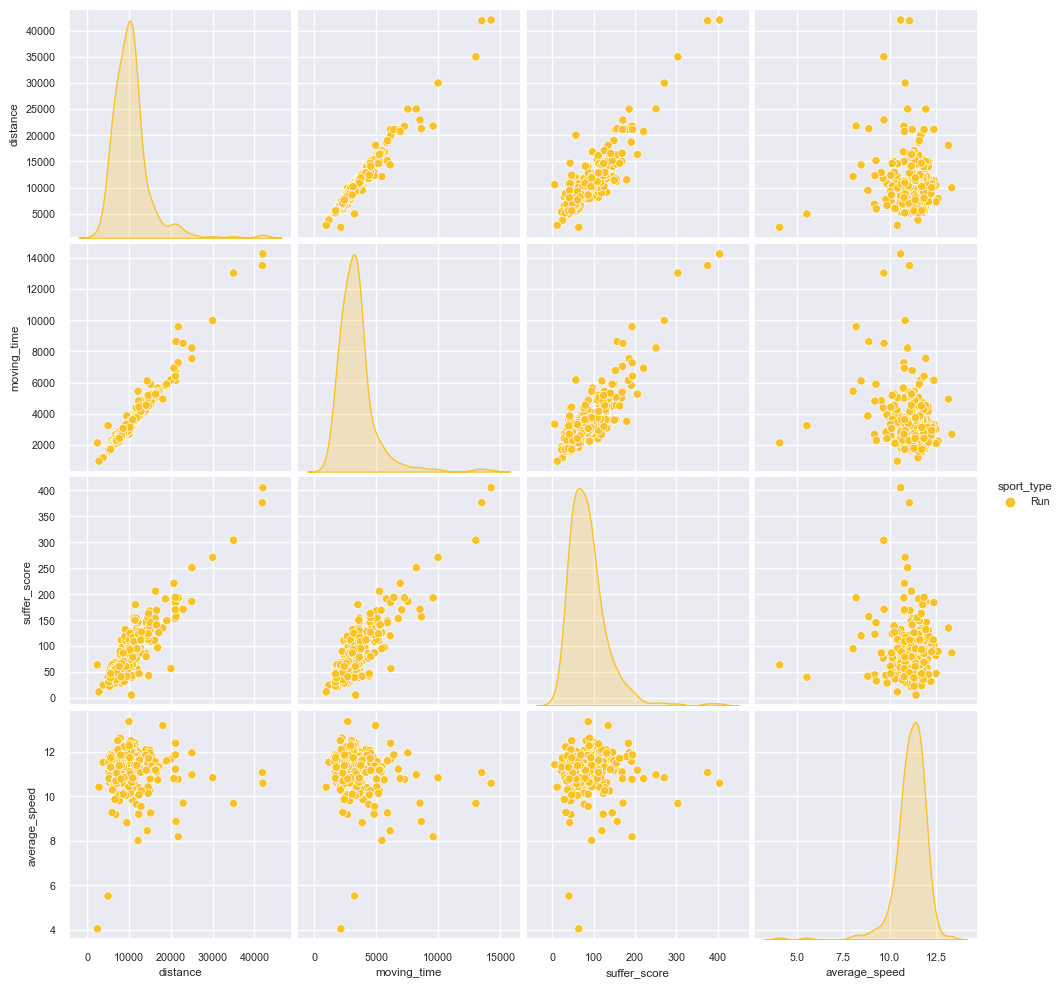

In [67]:
sns.pairplot(data=df_final[df_final["sport_type"]=="Run"][['distance', 'moving_time','sport_type','suffer_score','average_speed']], hue="sport_type")

In [68]:
df_corr = df_final[['distance','moving_time','elapsed_time','total_elevation_gain','total_elevation_gain','average_speed','max_speed','average_cadence','average_temp','average_heartrate','suffer_score']][df_final["sport_type"]=="Run"].corr()

In [69]:
df_corr.columns

Index(['distance', 'moving_time', 'elapsed_time', 'total_elevation_gain',
       'total_elevation_gain', 'average_speed', 'max_speed', 'average_cadence',
       'average_temp', 'average_heartrate', 'suffer_score'],
      dtype='object')

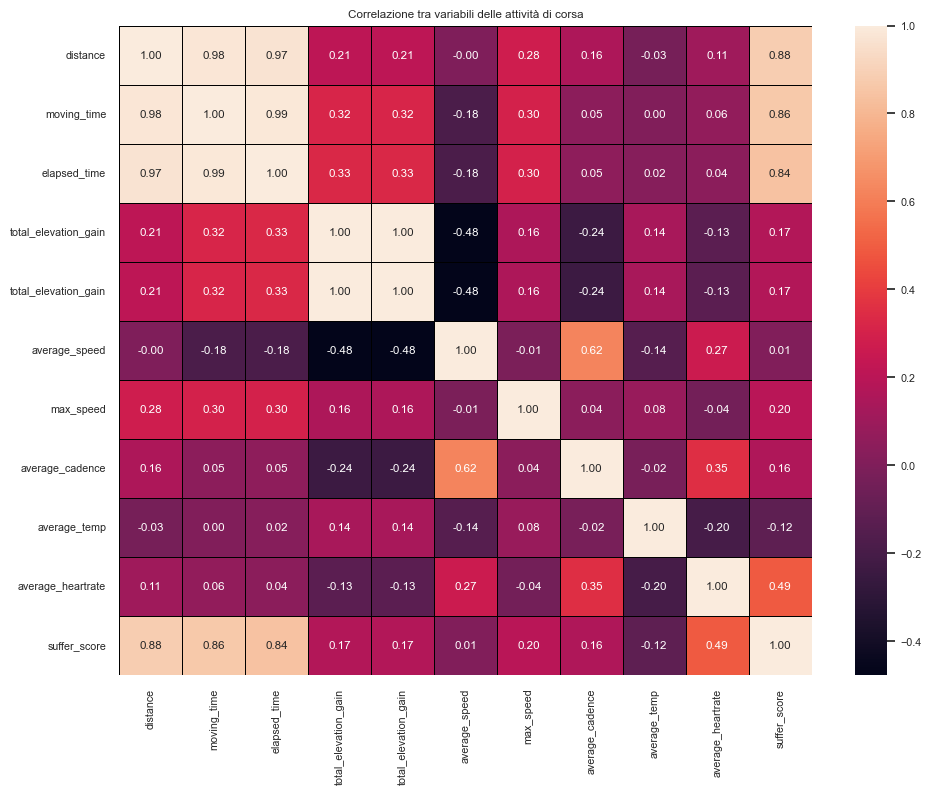

In [70]:
plt.figure(figsize=(10, 8))
plt.title(label="Correlazione tra variabili delle attività di corsa")
sns.heatmap(data=df_corr, annot=True, fmt=".2f", linewidths=0.5, linecolor="black")
plt.tight_layout()
plt.show()

Prendo come variabile target il moving time e come variabile dipendente la distanza.
In questo primo esercizio non suddivido il Dataset in Train e set

In [71]:
X = df_final["distance"][df_final["sport_type"]=="Run"].values
y = df_final["moving_time"][df_final["sport_type"]=="Run"].values

In [72]:
print(f"Distance -> type object: {type(X)}, shape: {X.shape}")
print(f"Moving_time -> type object: {type(y)}, shape: {y.shape}")

Distance -> type object: <class 'numpy.ndarray'>, shape: (330,)
Moving_time -> type object: <class 'numpy.ndarray'>, shape: (330,)


In [73]:
X = X.reshape(-1, 1)
X[:10]

array([[10173.7],
       [10058. ],
       [11687.1],
       [ 9385.4],
       [ 9408. ],
       [10272.9],
       [10031.7],
       [ 8202.3],
       [ 7899.4],
       [ 7820.5]])

In [74]:
lr = LinearRegression()

In [75]:
#Alleno il modello
lr.fit(X, y)

LinearRegression()

In [76]:
print(f"Intercetta: {lr.intercept_}, coefficiente: {lr.coef_[0]}")

Intercetta: -100.16430833011964, coefficiente: 0.33513822585812403


In [77]:
# dalla retta che ho estratto posso dedurre il moving time per la distanza di 15000 metri

distance = 21000
tempo_predetto = lr.intercept_ + lr.coef_ * distance

In [78]:
tempo_predetto

array([6937.73843469])

In [79]:
tempo_predetto/60.0

array([115.62897391])

Il modello prevede che per la distanza della mezza maratona il tempo sia di 115 minuti

In [80]:
distance = 42000
tempo_predetto_maratona = lr.intercept_ + lr.coef_ * distance
tempo_predetto_maratona/60

array([232.92735296])

Il modello prevede che per la distanza della maratona il tempo sia di 233 minuti.
3 ore e 53 minuti.

In [92]:
#Questi sono i tempi in maratona fatti registrare
df_final[df_final["name"].str.contains("Mara")][["name","distance_km","Moving_time_minute"]].head(1)

,name,distance_km,Moving_time_minute
103,Maratona di Milano,41.9115,225.0


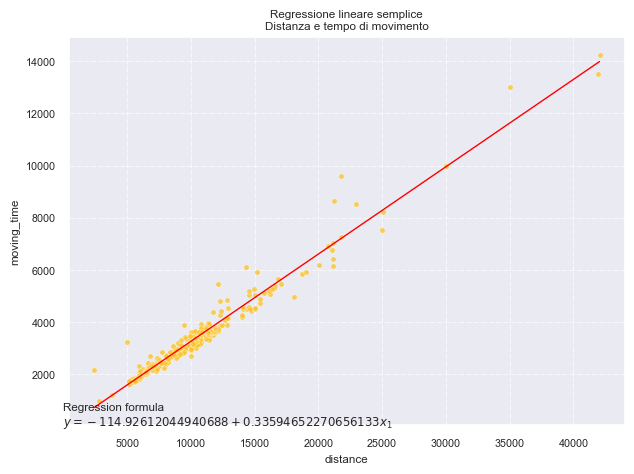

In [96]:
#Prevede tutti i valori in base a quelli inseriti
y_pred = lr.predict(X)

title = "Regressione lineare semplice" + "\n" + "Distanza e tempo di movimento"
text = "Regression formula" + "\n" + "$y = -114.92612044940688 + 0.33594652270656133x_1$"
plt.title(label=title)
sns.scatterplot(data=df_final[df_final["sport_type"]=="Run"], x="distance", y="moving_time", s=15, alpha=0.75)

sns.lineplot(x=df_final[df_final["sport_type"]=="Run"]["distance"], y=y_pred, linewidth=1, color="red")
plt.text(x=0, y=26, s=text)
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

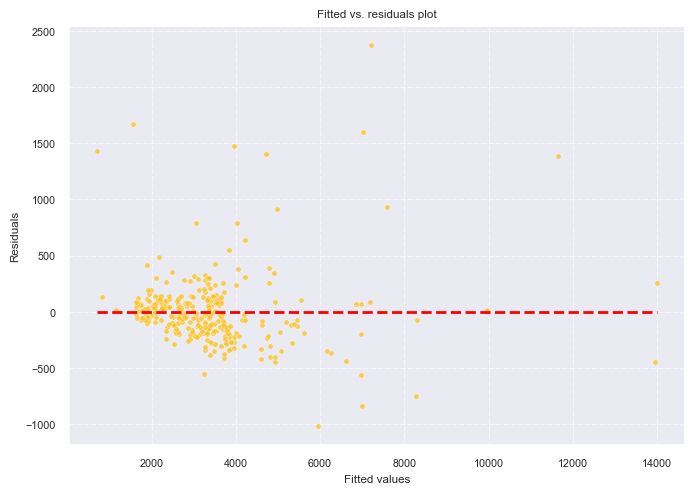

In [82]:
# compute the residuals of of the fitted model
residuals = df_final["moving_time"][df_final["sport_type"]=="Run"] - y_pred

# aestethic plot parameters
xmin, xmax = y_pred.min(), y_pred.max()

# plot of the figure
plt.figure(figsize=(7, 5))
plt.title("Fitted vs. residuals plot")
sns.scatterplot(x=y_pred, y=residuals, s=15, alpha=0.75)
plt.hlines(y=0, xmin=xmin, xmax=xmax, colors="red", linestyles="--", linewidth=2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

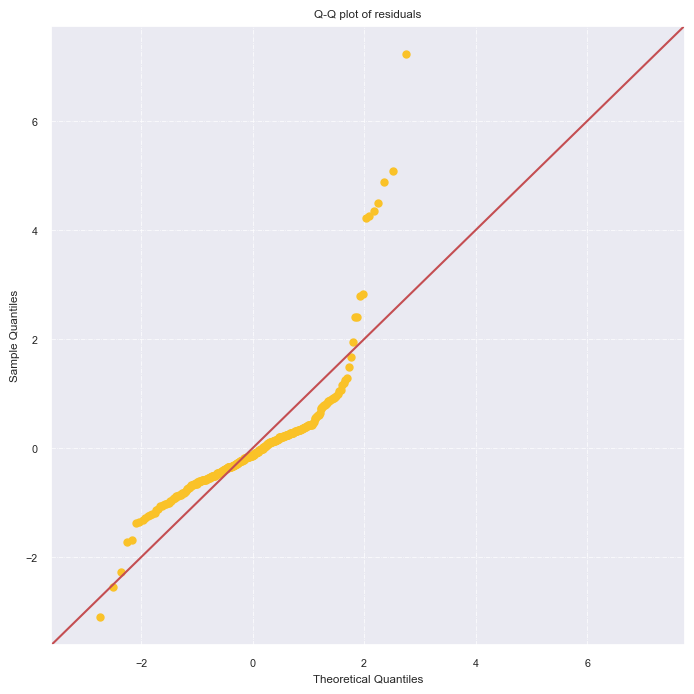

In [83]:
fig = plt.figure(figsize=(7, 7))
ax = fig.subplots()
qqplot(data=residuals, line="45", fit="True", markersize=5, ax=ax)
plt.title("Q-Q plot of residuals")
plt.grid(linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.show()

Calcolo di R quadro: il coefficiente di determinazione

In [84]:

r2 = r2_score(y_true=y, y_pred=y_pred)
print(f"r2 score: {r2:.4f}")

r2 score: 0.9581
